# Lab 9: Bootstrap, Resampling, CLT

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation.html)
* [Why the Mean Matters](https://www.inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)

Lab 9 is due Monday March 28th at 8:00am 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

As usual, **run the cell below** to import the modules.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. The CLT and Book Reviews

Your friend has recommended that you read the book [*Data Feminism* by D'Ignazio and Klein](https://www.amazon.com/Feminism-Strong-Ideas-Catherine-DIgnazio-ebook/dp/B08BT3SY5N/ref=sr_1_1?crid=23323Z3L746DV&keywords=data+feminism&qid=1647700779&sprefix=data+feminism%2Caps%2C58&sr=8-1), so you look for it on Amazon. You decide to look at reviews for the book just to be sure that it's worth buying. The book has 170 ratings (but only 22 reviews), with more than 90% of the ratings for 5 stars. `DF_reviews.csv` contains the number of stars (on a 1-5 scale) for the 22 reviews. 

Here, we've loaded in the table for you.

In [2]:
DF_reviews = Table.read_table("../Datasets/DF_reviews.csv") 
DF_reviews

Rating
5
5
5
5
5
5
5
5
5
5


**Question 1.1**. Calculate the average star ratings from your sample of Amazon reviews and assign it to `initial_sample_mean`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [3]:
initial_sample_mean = np.mean(DF_reviews)
initial_sample_mean

Rating
4.81818


You've calculated the average star ratings from your sample, so now you want to do some inference using this information. 

**Question 1.2**. First, simulate 10,000 bootstrap resamples of the average star ratings. For each bootstrap resample, calculate the resample mean and store the resampled means in an array called `resample_star_ratings`. Then, plot a histogram of the resampled means.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

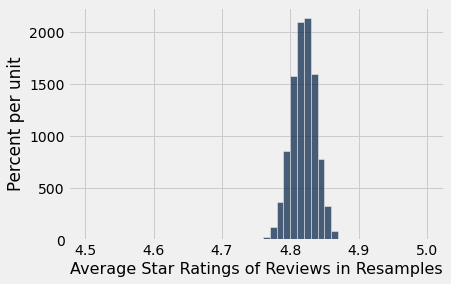

In [4]:
resamples_star_ratings = []

for i in np.arange(0,10001,1):
    resample_avg_rating = np.mean(DF_reviews.sample(1000, with_replacement=True))
    resamples_star_ratings.append(resample_avg_rating[0])
    
# Do NOT change these lines.
Table().with_column(
    "Average Star Ratings of Reviews in Resamples", 
    resamples_star_ratings
).hist("Average Star Ratings of Reviews in Resamples", bins = np.arange(4.5, 5.01, 0.01))

In [5]:
# resamples_star_ratings

**Question 1.3**. What is the the shape of the empirical distribution of the average star ratings based on our original sample? What value is the distribution centered at? Assign your answer to the variable `initial_sample_mean_distribution`--your answer should be either `1`, `2`, `3`, or `4` corresponding to the following choices:

*Hint: Look at the histogram you made in Question 2. Run the cell that generated the histogram a few times to check your intuition.*

1. The distribution is approximately normal because of the Central Limit Theorem, and it is centered at the original sample mean.
2. The distribution is not necessarily normal because the Central Limit Theorem may not apply, and it is centered at the original sample mean.
3. The distribution is approximately normal because of the Central Limit Theorem, but it is not centered at the original sample mean.
4. The distribution is not necessarily normal because the Central Limit Theorem may not apply, and it is not centered at the original sample mean.

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [6]:
initial_sample_mean_distribution = 1

According to the Central Limit Theorem, the probability distribution of the sum or average of a *large random sample* drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn. 

**Question 1.4**. Note the statement about the sample being large and random. Is this sample large and random? Give a brief explanation.

*Note: The setup at the beginning of this exercise explains how the sample was gathered.*

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

THis sample is large and random.  The sample is large because it has a sample size greater than 30.  This sample is also random because we are using the python "sample" function, which randomly selects values from the origninal population. 

Though you have an estimate of the true star ratings of reviews, you want to measure how variable this estimate is. 

**Question 1.5**. Find the standard deviation of your resampled average star ratings, which you stored in `resample_star_ratings`, and assign the result to the variable `resampled_means_variability`.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [7]:
# Changing data types

resamples_star_ratings_list = [] 

for x in np.arange(0,len(resamples_star_ratings),1):
    resamples_star_ratings_list.append(resamples_star_ratings[x][0])
    
# resamples_star_ratings_list

In [8]:
import statistics as st

resampled_means_variability = st.stdev(resamples_star_ratings_list)
resampled_means_variability

0.017902349716935533

That doesn't seem like much variability in the ratings, but let's look at a larger collections of reviews from [Goodreads.com](https://www.goodreads.com/book/show/51777543-data-feminism). Goodreads has 630 ratings for the book, with 99 of those including a written review. The ratings for the reviews are loaded into the table `more_DF_reviews`.

In [9]:
# Just run this cell
more_DF_reviews = Table.read_table("../Datasets/more_DF_reviews.csv")
more_DF_reviews

Rating
5
5
5
5
5
5
5
5
5
5


In the next few questions, we'll test an important result of the Central Limit Theorem. According to the CLT, the standard deviation of all possible sample means can be calculated using the following formula:

$$
\text{SD of all possible sample means} = \dfrac{\text{Population SD}}{\sqrt{\text{sample size}}}
$$

This formula gives us another way to approximate the SD of the sample means other than calculating it empirically. We can test how well this formula works by calculating the SD of sample means for different sample sizes.

The following code calculates the SD of sample means using the CLT and empirically for a range of sample sizes. Then, it plots a scatter plot comparing the SD of the sample means calculated with both methods. Each point corresponds to a different sample size. 

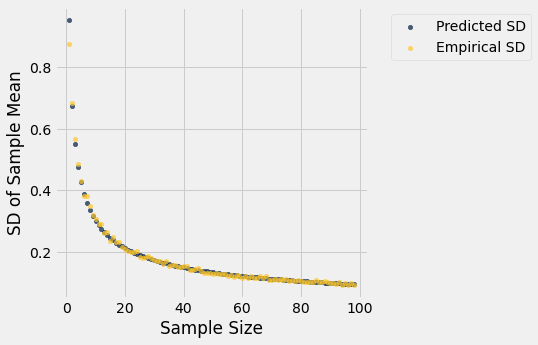

In [10]:
# Just run this cell. It's not necessary for you to read this code, but you can do 99% of this on your own!
# Note: this cell might take a bit to run.

def empirical_sample_mean_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = more_DF_reviews.sample(n).column('Rating') 
        sample_mean = np.mean(sample) 
        sample_means = np.append(sample_means, sample_mean) 
    return np.std(sample_means)

def predict_sample_mean_sd(n):
    return np.std(more_DF_reviews.column(0)) / (n**0.5)

sd_table = Table().with_column('Sample Size', np.arange(1,99))
predicted = sd_table.apply(predict_sample_mean_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sample_mean_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')
plt.ylabel("SD of Sample Mean");

**Question 1.6**. Assign the numbers corresponding to all true statements to an array called `sample_mean_sd_statements`. 
1. The plot above shows that as our sample size increases, our estimate for the true average star ratings becomes more accurate. 
2. The SD of the sample means is proportional to the square root of the sample size.
3. The law of large numbers tells us that the distribution of a large random sample should resemble the distribution from which it is drawn.  
4. The SD of the sample means is proportional to 1 divided by the square root of the sample size. 
5. The law of large numbers guarantees that empirical and predicted sample mean SDs will be approximately equal to each other when the sample size is large.
6. The law of large numbers guarantees that empirical and predicted sample mean SDs will be exactly equal to each other when the sample size is large.
7. The plot above shows that the size of the population affects the SD of the sample means.


<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [11]:
sample_mean_sd_statements = make_array(1,3,4,5,7)

Often times, when conducting statistical inference, you'll want your estimate of a population parameter to have a certain accuracy. It is common to measure accuracy of an estimate using the SD of the estimate--as the SD goes down, your estimate becomes less variable. As a result, the width of the confidence interval for your estimate decreases (think about why this is true). We know from the Central Limit Theorem that when we estimate a sample mean, the SD of the sample mean decreases as the sample size increases (again, think about why this is true).  

**Question 1.7**. Imagine you are asked to estimate the true average star rating for this book and you have not yet taken a sample of reviews. Which of these is the best way to decide how large your sample should be to achieve a certain level of accuracy for your estimate of the true average star rating? Assign `sample_size_calculation` to either `1`, `2`, or `3` corresponding to the statements below.

*Note: Assume that you know the population SD or can estimate it with reasonable accuracy.*
1. Take many random samples of different sizes, then calculate empirical confidence intervals using the bootstrap until you reach your desired accuracy. 
2. Randomly pick a sample size and hope for the best.
3. Use the Central Limit Theorem to calculate what sample size you need in advance.

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [12]:
sample_size_calculation = 1

## 2. The CLT and Book Reviews - Determining Accuracy

Rather than look at the star ratings of the reviews, let's instead look at the proportion of positive reviews. We'll consider reviews to be positive if they have a star rating of either 4 or 5. 

**Question 2.1** Construct a new table `more_DF_reviews_positive`. This table should have the same `Rating` column as `more_DF_reviews` as well as a second column `Positive`. The value of `Positive` should be `1` if the star rating for the review is a `4` or `5` and a `0` if the star rating for the review is `1`, `2`, or `3`.

In [13]:
more_DF_reviews["Positive"] = [1 if x == 4 or x == 5 else 0 for x in more_DF_reviews["Rating"]]
more_DF_reviews

Rating,Positive
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1


In [14]:
more_DF_reviews_positive = more_DF_reviews
more_DF_reviews_positive

Rating,Positive
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1
5,1


**Question 2.2**. Simulate 10,000 bootstrap resamples of the proportion of positive results from the GoodReads reviews. For each bootstrap resample, calculate the proportion of positive reviews and store the resampled proportions in an array called `resamples_positive_prop`. Then, plot a histogram of the resampled proportions.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [15]:
more_DF_reviews_positive.sample(5)

Rating,Positive
4,1
5,1
4,1
5,1
5,1


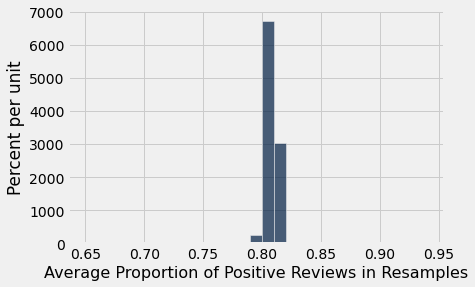

In [19]:
resamples_positive_prop = []

for i in np.arange(0,10001,1):
    resample2 = more_DF_reviews_positive.sample(10000, with_replacement = True)
    resample2_positive_prop = resample2[1].sum()/len(resample2[0])
    resamples_positive_prop.append(resample2_positive_prop)
    
# Do NOT change these lines.
Table().with_column(
    "Average Proportion of Positive Reviews in Resamples", 
    resamples_positive_prop
).hist("Average Proportion of Positive Reviews in Resamples", bins = np.arange(0.65, 0.95, 0.01))

**Question 2.3** Use the `resamples_positive_prop` array from the previous problem to construct a 95% confidence interval for the proportion of people that would review [*Data Feminism* by D'Ignazio and Klein](https://www.amazon.com/Feminism-Strong-Ideas-Catherine-DIgnazio-ebook/dp/B08BT3SY5N/ref=sr_1_1?crid=23323Z3L746DV&keywords=data+feminism&qid=1647700779&sprefix=data+feminism%2Caps%2C58&sr=8-1) positively. Assign `upper_bound` to the upper bound of your confidence interval and `lower_bound` to the lower bound.

In [20]:
upper_bound = percentile(97.5, resamples_positive_prop)
lower_bound = percentile(2.5, resamples_positive_prop)

print('We predict with 95% confidence that between the proportions of',
      np.round(lower_bound,3),
      'and',
      np.round(upper_bound, 3),
      "of people would review Data Feminism by D'Ignazio and Klein positively"
     )      

We predict with 95% confidence that between the proportions of 0.8 and 0.816 of people would review Data Feminism by D'Ignazio and Klein positively


Suppose that you plan to collect a random sample of reviews from the internet in order to predict what proportion of people would review [*Data Feminism* by D'Ignazio and Klein](https://www.amazon.com/Feminism-Strong-Ideas-Catherine-DIgnazio-ebook/dp/B08BT3SY5N/ref=sr_1_1?crid=23323Z3L746DV&keywords=data+feminism&qid=1647700779&sprefix=data+feminism%2Caps%2C58&sr=8-1) positively. You would like to predict this proportion with at worst $\pm$3% accuracy. How large of a sample of reviews would you need to collect in order to guarantee this? During class 28 we will spend time discussing the relationship between the sample size and the width of a 95% confidence interval for proportions. If you are completing this lab before Class 28, you can refer to section 14.6 [Choosing a Sample Size](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html#) of the textbook for more details.

The relationship between the sample size and width of a 95% confidence interval is shown with the following equation:

$$
\sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{\mbox{SD of the 0-1 population}}{\mbox{Width of Confidence Interval}}
$$

**Question 2.4** Use the equation above to determine the size of the sample needed to guarantee the construction of a 95% confidence interval with at worst $\pm$3% accuracy. Assign this value to `sample_size_needed`.

*Hint 1*: What would be the *width* of an interval with $\pm$3% accuracy?

*Hint 2*: Your sample size must be a whole number

In [38]:
sd_of_01_pop = st.stdev(more_DF_reviews_positive["Positive"])
CI_width = 6

sd_of_01_pop

0.0

In [39]:
sample_size_needed = 4*(sd_of_01_pop/CI_width)
sample_size_needed

0.0

Because this isn't working properly, I would say that the sample size has to at least be greater than 30 to just meet CLT recommended smaple size

That's it! You've completed Lab 9. 